In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Define your trip dates
start_date = dt.datetime(2017, 8, 10)
end_date= dt.datetime(2017,8,23)

# Perform a query to retrieve the data and precipitation scores
precip = [Measurement.date, func.avg(Measurement.prcp)]
precip12 = session.query(*precip).\
    filter(Measurement.date >= "2016-08-23").\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data= pd.DataFrame(data=precip12, columns=['date','avg precipitation'])
precip_data['date'] = pd.to_datetime(precip_data['date'])
precip_data.set_index('date', inplace=True)
precip_data.head()




,avg precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


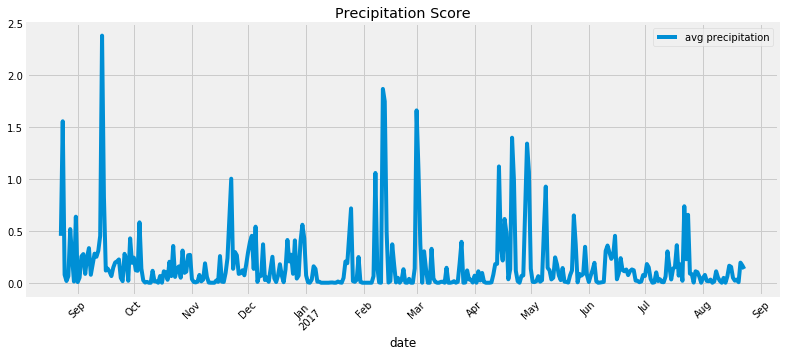

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_data.plot(figsize=(12,5),title='Precipitation Score',use_index=True, rot=45)
plt.xlabel('date')
plt.show()
# Rotate the xticks for the dates


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data.describe()

,avg precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Station Analysis

In [14]:
# How many stations are available in this dataset?
station_count = session.query(Station.id).count() 
station_count

9

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_act = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
station_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp= [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
most_active=session.query(*temp).\
    filter(Measurement.station=='USC00519281').all()
most_active

[(54.0, 85.0, 71.66378066378067)]

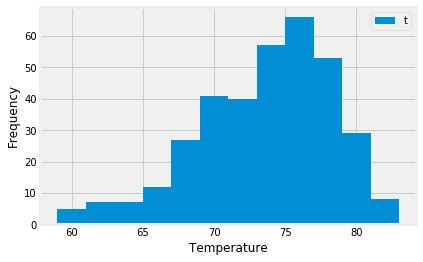

In [17]:
# Choose the station with the highest number of temperature observations.
station1='USC00519281'
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp12=[Measurement.tobs]
most_active_temp12=session.query(*temp12).\
    filter(Measurement.station=='USC00519281', Measurement.date >= "2016-08-23").all()
year_temp=list(np.ravel(most_active_temp12))
plt.hist(year_temp, bins=12)
plt.ylabel('Frequency')
plt.legend('tobs')
plt.xlabel('Temperature')
plt.show()
